In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [52]:
df = pd.read_csv("/home/saksham/AVI/Projects/Sentiment-Comments/data/processed/updated.csv")
df.head

<bound method NDFrame.head of      Stars                                           Comments  sentiments  \
0        4  Really interesting book, it will teach us many...           4   
1        4  "The Alchemist " is a book for ones who love b...           4   
2        5  This book is amazing. It changes one perspecti...           5   
3        4            Good book to have of you Are a beginner           4   
4        5  Loved it, the story was amazing and something ...           5   
..     ...                                                ...         ...   
374      2  Pages feel like rough paper, hard, after repla...           2   
375      2  It is more like a religious book (with words l...           2   
376      1  It a not a special book. Just with basic know ...           1   
377      1  Entire book revolves around two things conscio...           1   
378      1  Most over imagination and complete materialist...           1   

     positive  negative  class  
0           

In [53]:
df.isna().sum()

Stars         0
Comments      0
sentiments    0
positive      0
negative      0
class         0
dtype: int64

In [54]:
df = df.dropna()

In [55]:
df

,Stars,Comments,sentiments,positive,negative,class
0,4,"Really interesting book, it will teach us many...",4,1,1,1
1,4,"""The Alchemist "" is a book for ones who love b...",4,5,0,1
2,5,This book is amazing. It changes one perspecti...,5,1,0,1
3,4,Good book to have of you Are a beginner,4,1,0,1
4,5,"Loved it, the story was amazing and something ...",5,2,0,1
...,...,...,...,...,...,...
374,2,"Pages feel like rough paper, hard, after repla...",2,1,1,0
375,2,It is more like a religious book (with words l...,2,2,0,1
376,1,It a not a special book. Just with basic know ...,1,0,0,0
377,1,Entire book revolves around two things conscio...,1,0,0,0


In [56]:
df.isna().sum()

Stars         0
Comments      0
sentiments    0
positive      0
negative      0
class         0
dtype: int64

In [57]:
df.columns

Index(['Stars', 'Comments', 'sentiments', 'positive', 'negative', 'class'], dtype='object')

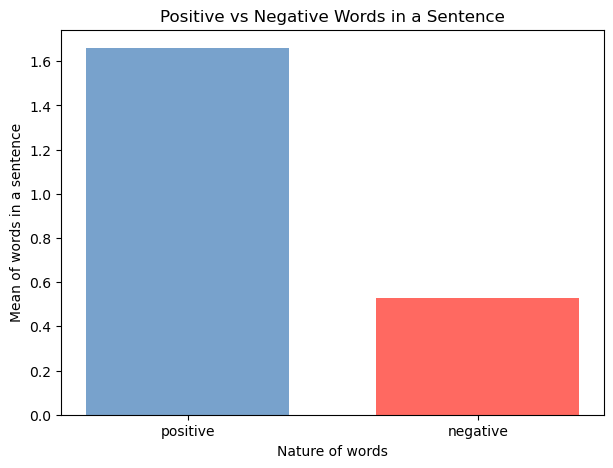

In [58]:
fig = plt.figure(figsize = (7, 5))
plt.bar(['positive','negative'], [df['positive'].mean(), df['negative'].mean()], 
        color=['#78A2CC', '#FF6961'], width=0.7)
plt.xlabel('Nature of words')
plt.ylabel('Mean of words in a sentence')
plt.title('Positive vs Negative Words in a Sentence')
plt.show()

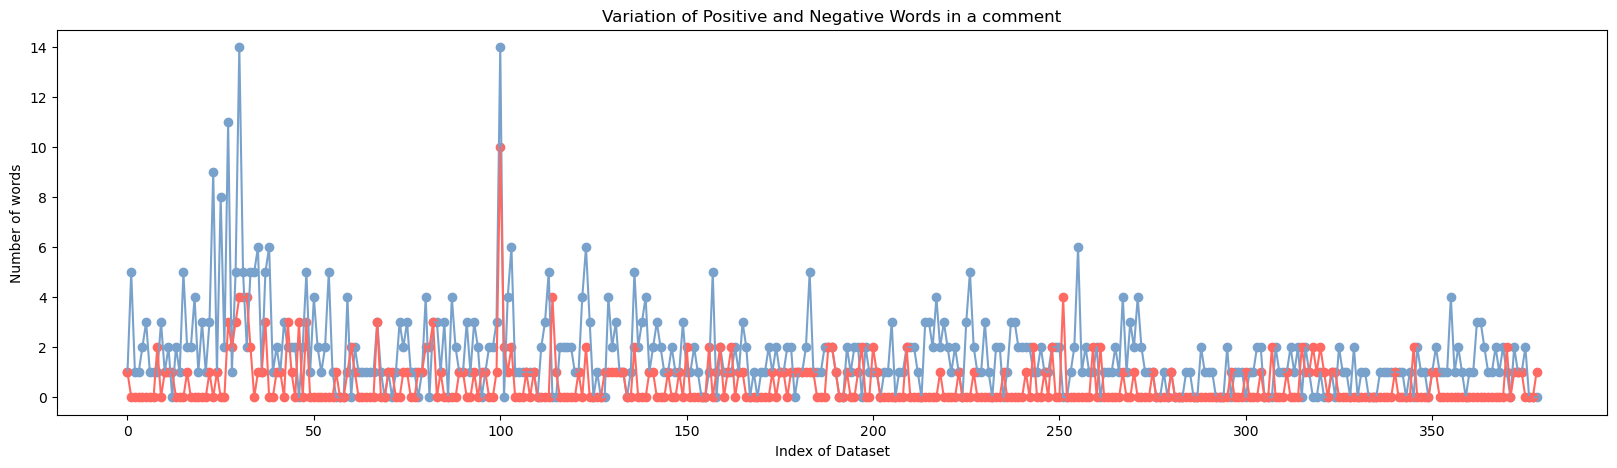

In [59]:
fig = plt.figure(figsize = (20, 5))
plt.plot(range(0, len(df['positive'])), df['positive'], color='#78A2CC')
plt.scatter(range(0, len(df['positive'])), df['positive'], color='#78A2CC')
plt.plot(range(0, len(df['positive'])), df['negative'], color='#FF6961')
plt.scatter(range(0, len(df['positive'])), df['negative'], color='#FF6961')
plt.xlabel('Index of Dataset')
plt.ylabel('Number of words')
plt.title('Variation of Positive and Negative Words in a comment')
plt.show()

In [60]:
x = df.drop(['Comments', 'sentiments', 'class'], axis=1)
y = df['class']

In [61]:
x.head

<bound method NDFrame.head of      Stars  positive  negative
0        4         1         1
1        4         5         0
2        5         1         0
3        4         1         0
4        5         2         0
..     ...       ...       ...
374      2         1         1
375      2         2         0
376      1         0         0
377      1         0         0
378      1         0         1

[379 rows x 3 columns]>

In [62]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
374    0
375    1
376    0
377    0
378    0
Name: class, Length: 379, dtype: int64>

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [92]:
model = LogisticRegression(solver="lbfgs")
model.fit(x_train, y_train)
print("Accuracy is:" ,model.score(x_test, y_test)*100,"%")

Accuracy is: 90.52631578947368 %


In [91]:
model1 =LogisticRegression(solver="newton-cg").fit(x_train,y_train)
print("Accuracy is:" ,model1.score(x_test, y_test)*100,"%")


Accuracy is: 90.52631578947368 %


In [93]:
model.predict(x_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1])

In [94]:
arr = np.asarray(y_test)
arr

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1])

In [95]:
lr_cm = confusion_matrix(y_test, model.predict(x_test))
lr_cm

array([[34,  6],
       [ 3, 52]])

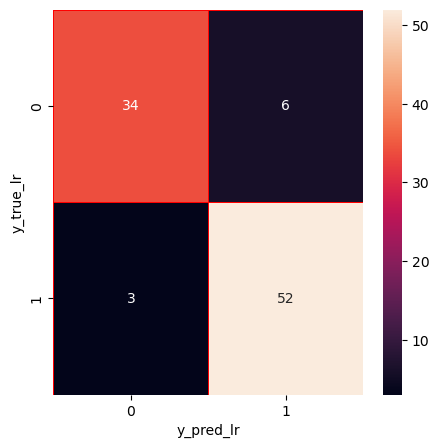

In [97]:
y_pred_model1 = model1.predict(x_test)
y_actual_model1 = y_test
cm = confusion_matrix(y_actual_model1, y_pred_model1)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()